## Method 1: Imshow No Oversampling

### 1.1 Perform Calculations

In [12]:
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

r_min = 2.5
r_max = 4
x_min = 0
x_max = 1
r_range = r_max - r_min
x_range = x_max - x_min
resolution = 0.001
pre_iterations = 1024
iterations = 1024
r_n = int(r_range/resolution)
x_n = int(x_range/resolution)

rs = np.linspace(r_min, r_max, r_n, endpoint=False)
xs = np.linspace(x_min, x_max, x_n, endpoint=False)
density = [[0] * (x_n) for i in range(r_n)]

for i in range(r_n):

  r = rs[i]
  r = r + 0.5*resolution
  seed = 0.25*r
  for n in range(pre_iterations):
    seed = r*seed*(1-seed)

  x = seed
  for n in range(iterations):

    x = r*x*(1-x)
    position = math.floor(x/resolution)

    if position < 0:
      position = 0
      print("low")
    elif position > (r_n-1):
      position = r_n-1
      print("high")
    
    density[i][position] += 1

### 1.2 Create Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

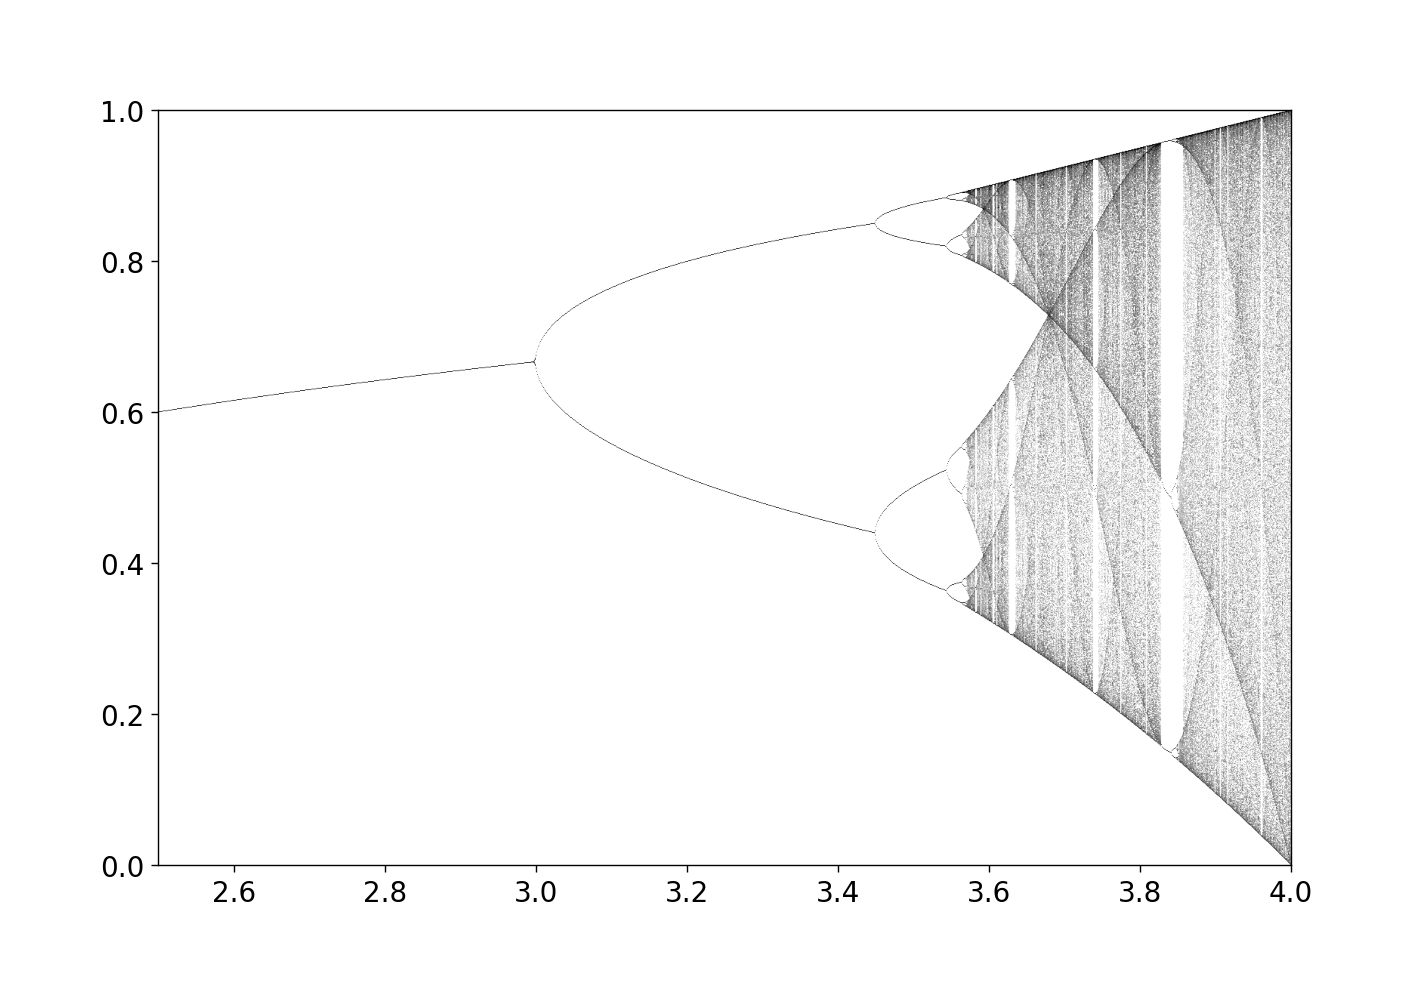

In [13]:
import copy
from google.colab import files

density1 = copy.deepcopy(density)

for i in range(r_n):
    cmax = 0
    for j in range(x_n):
        if density1[i][j] > cmax:
            cmax = density1[i][j]
    for j in range(x_n):
        density1[i][j] /= cmax

density1 = np.power(density1,0.35)

cutoff = 1
for i in range(r_n):
    for j in range(x_n):
        if density1[i][j] > cutoff:
            density1[i][j] = cutoff

#density1 = density1/max

log_map_bif_dia = np.transpose(density1)

reference_pixel_density = 1/resolution

fig, ax = plt.subplots(figsize=(r_range, x_range), dpi=reference_pixel_density)
ax.imshow(log_map_bif_dia, origin='lower', extent=[r_min,r_max,x_min,x_max], cmap=cm.Greys)
#ax.set_xlim(r_min, r_max)
#ax.set_ylim(x_min, x_max)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.1)
ax.tick_params(axis='both', which='major', length=0.5, width=0.1, pad=0.5, labelsize=2)
ax.tick_params(axis='both', which='minor', labelsize=1)
#ax.set_axis_off()
#fig.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)
plt.savefig(fname='figure.png')
#plt.show()

files.download('figure.png')

## Method 2: Imshow with Linear Oversampling

### 2.1 Perform Calculations

In [4]:
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

r_min = 2.5
r_max = 4
x_min = 0
x_max = 1
r_range = r_max - r_min
x_range = x_max - x_min

image_resolution = 0.001
linear_oversampling = 4
oversampling_resolution = image_resolution/linear_oversampling
pre_iterations = 2**10
iterations = 2**12

r_n = int(r_range/image_resolution)
x_n = int(x_range/image_resolution)
r_os_n = x_n*linear_oversampling

density = [[0] * (x_n) for i in range(r_n)]

for i in range(r_n):
    
    r_p = r_min + i*image_resolution + 0.5*oversampling_resolution

    for s in range(linear_oversampling):
        r = r_p + s*oversampling_resolution
        seed = 0.25*r

        for n in range(pre_iterations):
            seed = r*seed*(1-seed)
        
        x = seed
        for n in range(iterations):
            x = r*x*(1-x)
            position = math.floor(x/image_resolution)
            density[i][position] += 1

    if (i+1) % 100 == 0:
        progress = 100 * (i + 1) / r_n
        print("%.2f" % progress, "%")

6.67 %
13.33 %
20.00 %
26.67 %
33.33 %
40.00 %
46.67 %
53.33 %
60.00 %
66.67 %
73.33 %
80.00 %
86.67 %
93.33 %
100.00 %


### 2.2 Create Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

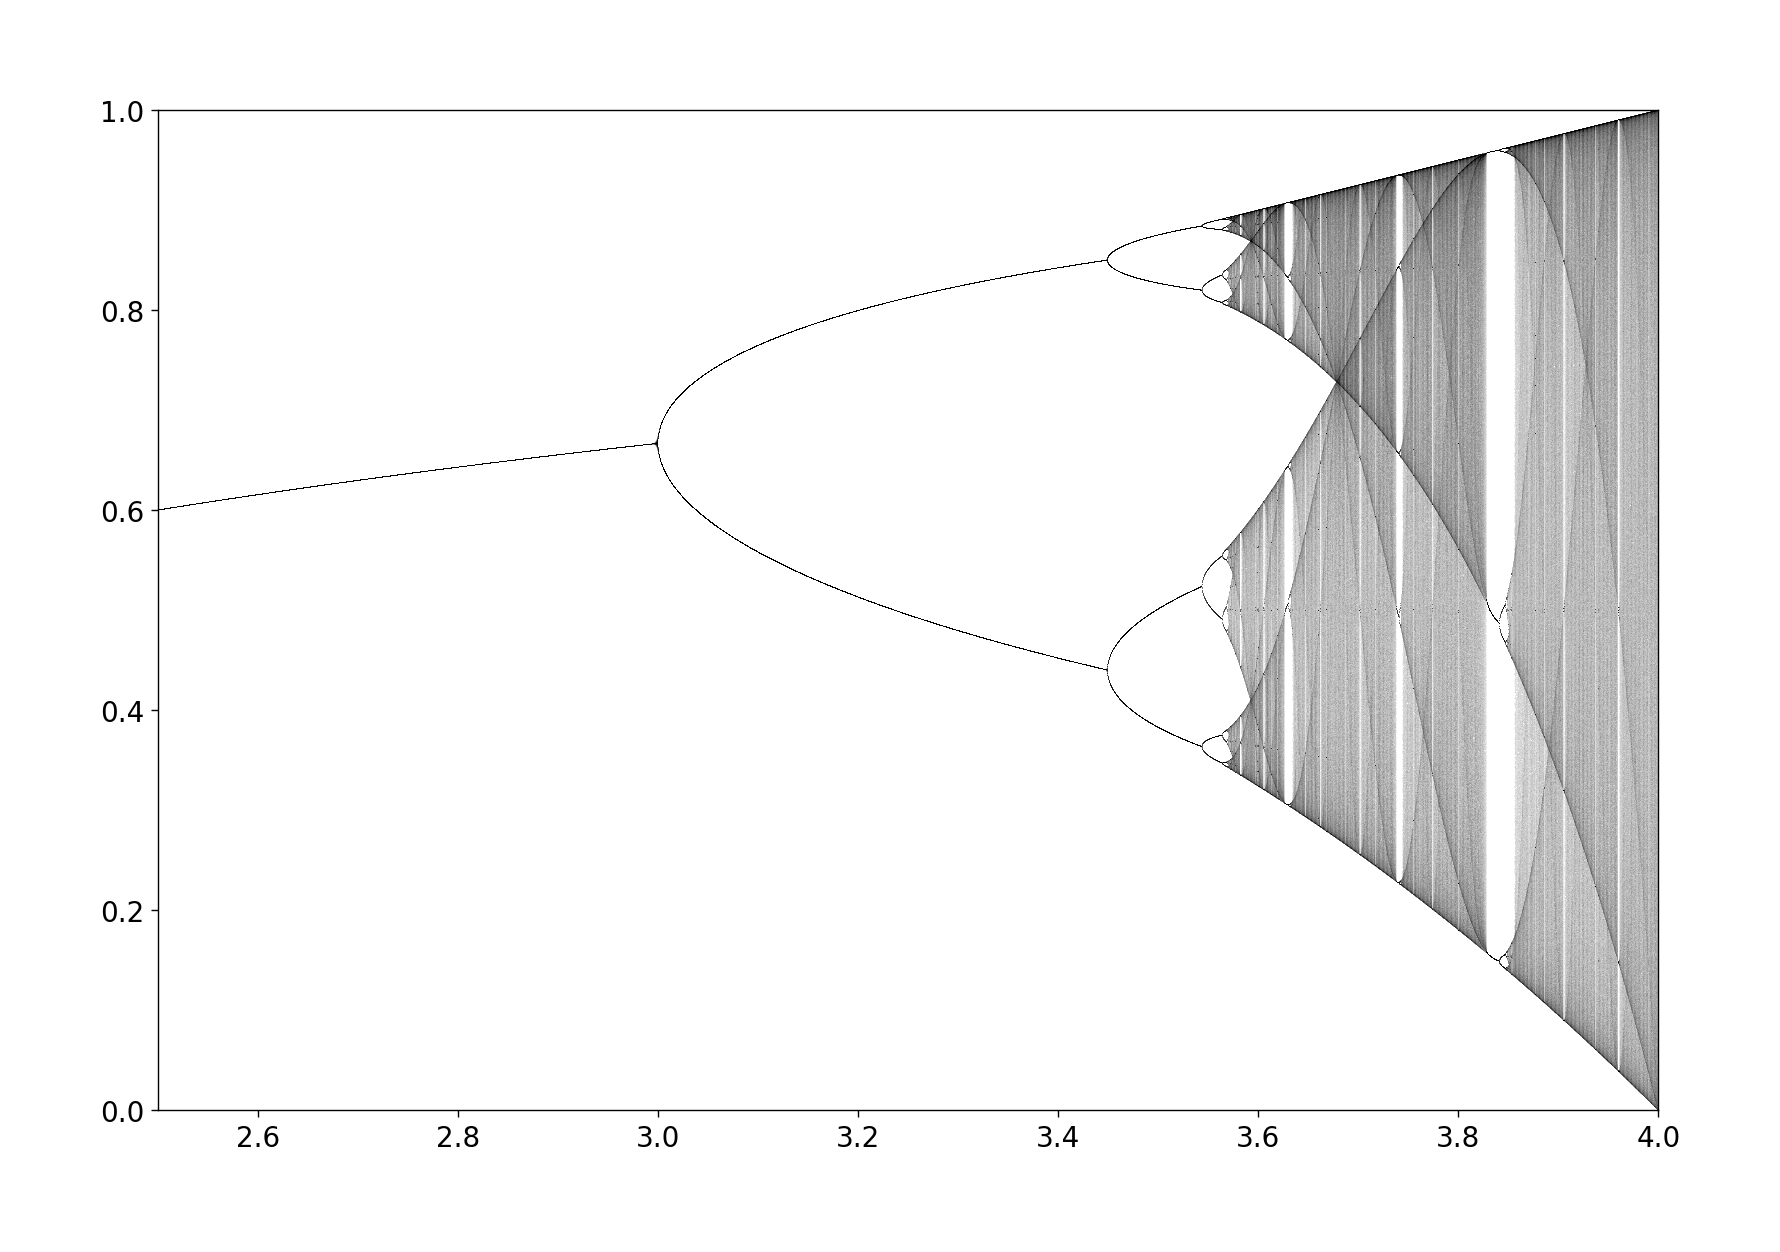

In [5]:
import copy
from google.colab import files

density1 = copy.deepcopy(density)

max = np.amax(density1)
cutoff_factor = 0.1
cutoff = cutoff_factor*max
for i in range(r_n):
  for j in range(x_n):
    if density1[i][j] > cutoff:
      density1[i][j] = cutoff

for i in range(r_n):
  cmax = 0
  for j in range(x_n):
    if density1[i][j] > cmax:
      cmax = density1[i][j]
  for j in range(x_n):
    density1[i][j] /= cmax

density1 = np.power(density1, 0.3)

cutoff1 = 1
for i in range(r_n):
  for j in range(x_n):
    if density1[i][j] > cutoff1:
      density1[i][j] = cutoff1

log_map_bif_dia = np.transpose(density1)

reference_pixel_density = 1/image_resolution

fig, ax = plt.subplots(figsize=(1.25*r_range, 1.25*x_range), dpi=reference_pixel_density)
ax.imshow(log_map_bif_dia, origin='lower', extent=[r_min,r_max,x_min,x_max], cmap=cm.Greys)
#ax.set_xlim(r_min, r_max)
#ax.set_ylim(x_min, x_max)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.1)
ax.tick_params(axis='both', which='major', length=0.5, width=0.1, pad=0.5, labelsize=2)
ax.tick_params(axis='both', which='minor', labelsize=1)
#ax.set_axis_off()
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig(fname='figure.png')
#plt.show()

files.download('figure.png')

## Alternative Method: Scatter Plot

### A.1 Perform Calculations

In [8]:
from google.colab import files
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

r_min = 2.5
r_max = 4
x_min = 0
x_max = 1
r_range = r_max - r_min
x_range = x_max - x_min
resolution = 0.001
pre_iterations = 1024
iterations = 1024
r_n = int(r_range/resolution)
x_n = int(x_range/resolution)

rs = np.linspace(r_min, r_max, r_n+1, endpoint=True)
rs_repeat = []
xs = []

for r in rs:

  seed = 0.25*r
  for i in range(pre_iterations):
    seed = r*seed*(1-seed)

  x = seed
  for i in range(iterations):
    x = r*x*(1-x)
    rs_repeat.append(r)
    xs.append(x)

### A.2 Create Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

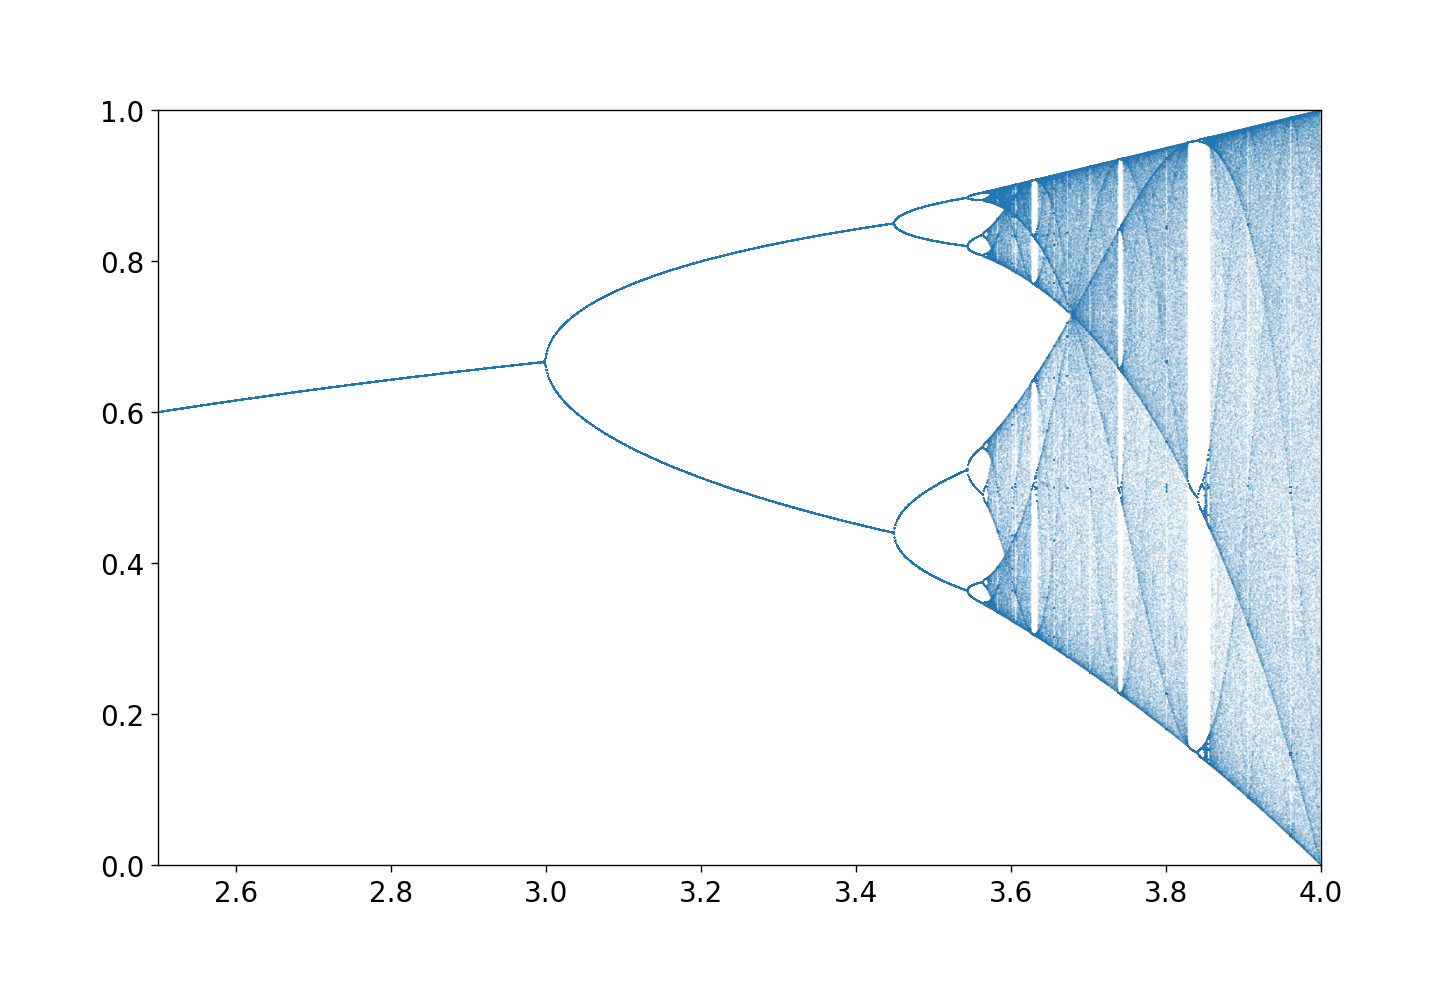

In [11]:
reference_pixel_density = 1/resolution

fig, ax = plt.subplots(figsize=(r_range, x_range), dpi=reference_pixel_density)
ax.scatter(rs_repeat, xs, s=0.05, marker=".", alpha=0.1, edgecolors="none")
ax.set_xlim(r_min, r_max)
ax.set_ylim(x_min, x_max)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.1)
ax.tick_params(axis='both', which='major', length=0.5, width=0.1, pad=0.5, labelsize=2)
#ax.set_axis_off()
#fig.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)
plt.savefig(fname='figure.png')
#plt.show()

files.download('figure.png')